In [1]:
import torch
from torch import nn
import torch.optim as optim
import numpy as np
from matplotlib import pyplot as plt


In [2]:
device= "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cpu


In [3]:
# i) learn how to model sequence-to-sequence learning problems using Recurrent Neural Networks.

In [4]:
# ii) compare different cells such as vanilla RNN, LSTM and GRU.

# The goal of this assignment is fourfold: 
# (i) learn how to model sequence to sequence learning problems using Recurrent Neural Networks
# (ii) compare different cells such as vanilla RNN, LSTM and GRU
# (iii) understand how attention networks overcome the limitations of vanilla seq2seq models
# (iv) visualise the interactions between different components in a RNN based model

In [35]:
# Generate sine wave data
def generate_data(seq_length, num_samples):
    X = []
    y = []
    for i in range(num_samples):
        x = np.linspace(i * 2 * np.pi, (i + 1) * 2 * np.pi, seq_length + 1)
#         print(x.shape)
        sine_wave = np.sin(x)
        X.append(sine_wave[:-1])  # input sequence
        y.append(sine_wave[1:])   # target sequence
    return np.array(X), np.array(y)

seq_length = 50
num_samples = 1000 # is this the batch size?
X, y = generate_data(seq_length, num_samples)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

print(X.shape, y.shape)  # Output: (1000, 50), (1000, 50)

torch.Size([1000, 50]) torch.Size([1000, 50])


In [36]:
x_rnn=X.clone()
y_rnn=y.clone()
print(X[0,:10])

print(y[0,:10])

tensor([0.0000, 0.1253, 0.2487, 0.3681, 0.4818, 0.5878, 0.6845, 0.7705, 0.8443,
        0.9048])
tensor([0.1253, 0.2487, 0.3681, 0.4818, 0.5878, 0.6845, 0.7705, 0.8443, 0.9048,
        0.9511])


In [7]:
print(X[0].shape)
print(X.unsqueeze(2).squeeze(2).shape)

torch.Size([50])
torch.Size([1000, 50])


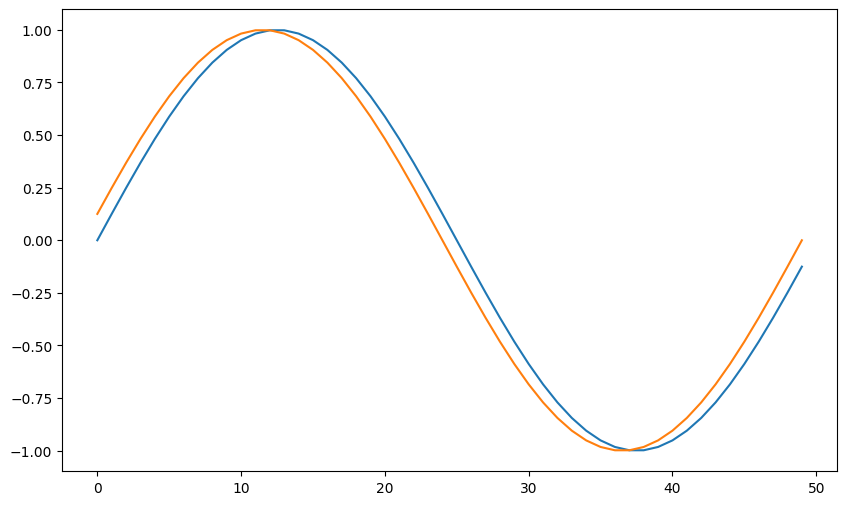

In [8]:
# Plot results
plt.figure(figsize=(10, 6))
plt.plot(X[0].numpy(), label='True')
plt.plot(y[0].numpy(), label='True')

In [9]:
# vanella flavour
import torch 
import torch.nn as nn

    
# Define model hyperparameters

# vocab_size = 50    # Size of the character vocabulary
# embedding_dim = 64 # Dimension of character embeddings
hidden_dim = 128   # Dimension of RNN hidden state
output_dim = 1    # Dimension of the output
input_size=1 # number of expected features in x

class SimpleRNN(nn.Module):
    def __init__(self,input_size, hidden_dim, output_dim):
        super(SimpleRNN,self).__init__()
#         self.embedding=nn.Embedding(vocab_size,embedding_dim)
        self.rnn=nn.RNN(input_size, hidden_size=hidden_dim)
        self.fc=nn.Linear(hidden_dim,output_dim)
        
     
    def forward(self,x):
        encoder_output, hidden_state=self.rnn(x)
        print("hidden state is ")
        print(hidden_state.shape)
        print("encoder output")
        print(encoder_output.shape)
        output=self.fc(encoder_output)
        return output

In [10]:

model = SimpleRNN(input_size, hidden_dim, output_dim)
print(model)

SimpleRNN(
  (rnn): RNN(1, 128)
  (fc): Linear(in_features=128, out_features=1, bias=True)
)


In [22]:
# # X= 1000,50
# j=torch.randn(2,3)
# print(j)
# j[-1]
temp=torch.randn(1000,128)
out=[]
for x in range(50):
    out.append(temp)
# print(len)
out=torch.stack(out)
out.transpose(0,1)
out.shape

torch.Size([50, 1000, 128])

In [12]:
model.eval()
with torch.no_grad():
    predictions = model(X.unsqueeze(2)) # x 1000,50,1--> input size, hidden size, output size
    # why are we adding dimensions- Understood- this has only one input feature
    print("prediction (after passing through linear layer) shape is ")
    print(predictions.shape)

hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
prediction (after passing through linear layer) shape is 
torch.Size([1000, 50, 1])


In [13]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X.unsqueeze(2))  # Add a dimension for input size
    loss = criterion(outputs, y.unsqueeze(2))
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step() # what does optimizer.step do- okay update the weight
    
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
Epoch [10/100], Loss: 0.1644
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 

hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
hidden state is 
torch.Size([1, 50, 128])
encoder output
torch.Size([1000, 50, 128])
Epoch [100/100], Loss: 0.0087


In [45]:
k=torch.randn(2,2)
print(k)
j=k.unsqueeze(1)
# print(k.shape)
print(j)
j.shape # 2,3,4,1

tensor([[-1.3496, -0.3068],
        [-0.0726,  0.3495]])
tensor([[[-1.3496, -0.3068]],

        [[-0.0726,  0.3495]]])


torch.Size([2, 1, 2])

In [38]:
# vanilla GRU
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Generate sine wave data
def generate_sine_wave(timesteps, steps_per_cycle=50, num_cycles=10):
    x = np.linspace(0, num_cycles * 2 * np.pi, steps_per_cycle * num_cycles)
    y = np.sin(x)
    return y

# Prepare the dataset for the GRU model
def prepare_dataset(data, timesteps):
    X, y = [], []
    for i in range(len(data) - timesteps):
        X.append(data[i:i + timesteps])
        y.append(data[i + timesteps])
    return np.array(X), np.array(y)

# Define the GRU-based model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        out, hidden = self.gru(x)
        print(f"hidden state shape of gru is {hidden.shape}")
        print(f"output of gru is {out.shape}")
        out = self.fc(out[-1])
        return out

# Parameters
timesteps = 50
steps_per_cycle = 50
num_cycles = 10
hidden_size = 64
output_size = 1
learning_rate = 0.001
num_epochs = 200
input_shape=1
output_shape=1
hidden_shape=128
# Generate and prepare the data
y = generate_sine_wave(timesteps, steps_per_cycle, num_cycles)
X, y = prepare_dataset(y, timesteps)

# Convert to PyTorch tensors
x_rnn = torch.tensor(x_rnn, dtype=torch.float32).unsqueeze(2)  # (batch_size, timesteps, input_size) 
# add the output dimension
y_rnn = torch.tensor(y_rnn, dtype=torch.float32).unsqueeze(2)  # (batch_size, output_size)

print(f"X shape is {x_rnn.shape}")
print(f"y shape is {y_rnn.shape}")
model=GRUModel(input_shape,hidden_shape,output_shape)

k=model(x_rnn)
print(f"shape of model outout {k.shape}")

C:\Users\syedm\AppData\Local\Temp\ipykernel_31316\2686005245.py:52: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_rnn = torch.tensor(x_rnn, dtype=torch.float32).unsqueeze(2)  # (batch_size, timesteps, input_size)
C:\Users\syedm\AppData\Local\Temp\ipykernel_31316\2686005245.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_rnn = torch.tensor(y_rnn, dtype=torch.float32).unsqueeze(2)  # (batch_size, output_size)


X shape is torch.Size([1000, 50, 1])
y shape is torch.Size([1000, 50, 1])
hidden state shape of gru is torch.Size([1, 50, 128])
output of gru is torch.Size([1000, 50, 128])
shape of model outout torch.Size([50, 1])


In [ ]:
# Initialize the model, loss function, and optimizer
model = GRUModel(input_size=1, hidden_size=hidden_size, output_size=output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


# Training loop
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X.transpose(0, 1))  # (timesteps, batch_size, input_size)
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Predict and plot the results
model.eval()
with torch.no_grad():
    predictions = model(X.transpose(0, 1)).numpy()

plt.plot(y.numpy(), label='True Sine Wave')
plt.plot(predictions, label='Predicted Sine Wave')
plt.legend()
plt.show()

In [15]:
class SimpleLSTM(nn.Module):
    def __init__(self,input_dim,hidden_dim, layer_dim,output_dim):
        super(SimpleLSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim # what is layer dim
        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x, h0=None, c0=None):
        # If hidden and cell states are not provided, initialize them as zeros
        if h0 is None or c0 is None:
            h0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
            c0 = torch.zeros(self.layer_dim, x.size(0), self.hidden_dim).to(x.device)
        
        # Forward pass through LSTM
        out, (hn, cn) = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Selecting the last output
        return out, hn, cn

In [16]:

# Initialize model, loss, and optimizer
model = SimpleLSTM(input_dim=1, hidden_dim=100, layer_dim=1, output_dim=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [17]:
# Training loop
num_epochs = 100
h0, c0 = None, None  # Initialize hidden and cell states

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    # Forward pass
    outputs, h0, c0 = model(X, h0, c0)

    # Compute loss
    loss = criterion(outputs, y)
    loss.backward()
    optimizer.step()

    # Detach hidden and cell states to prevent backpropagation through the entire sequence
    h0 = h0.detach()
    c0 = c0.detach()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.2368
Epoch [20/100], Loss: 0.0177
Epoch [30/100], Loss: 0.0065
Epoch [40/100], Loss: 0.0007
Epoch [50/100], Loss: 0.0003
Epoch [60/100], Loss: 0.0001
Epoch [70/100], Loss: 0.0000
Epoch [80/100], Loss: 0.0000
Epoch [90/100], Loss: 0.0000
Epoch [100/100], Loss: 0.0000


In [46]:
# import torch
# import torch.nn as nn

# # Define model hyperparameters

# vocab_size = 50    # Size of the character vocabulary
# embedding_dim = 64 # Dimension of character embeddings
# hidden_dim = 128   # Dimension of RNN hidden state
# output_dim = 10    # Dimension of the output

# # Create the model instance


# # Print the model architecture
# print(model)

# # Example input sequence (batch of sequences of character indices)
# example_input = torch.tensor([[1, 2, 3, 4], [4, 3, 2, 1]])  # Batch size = 2, sequence length = 4
# output = model(example_input)

# print("Output shape:", output.shape)  # Output shape: [batch_size, output_dim]


In [ ]:
######### encoder decoder model ########### attempt 2

In [47]:
import torch
import torch.nn as nn
import torch.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.nn.utils.rnn import pad_sequence
import numpy as np

In [48]:
print(torch.__version__)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

2.6.0+cpu


device(type='cpu')

In [49]:
import os
csv_list=[x for x in os.listdir('.') if x.endswith(".csv")]
print(csv_list)

['heart.csv', 'hin_test.csv']


In [50]:
######## pre prossing dataset #########
import csv
csv
with open(csv_list[1], 'r',encoding='utf-8') as file:
  reader = csv.reader(file) # gets every row--> what do to to get every line? is it necessary?
  next(reader)  # Skip the header row if it exists
  pairs=[row for row in reader]


In [67]:
# do the above with pandas

import pandas as pd
csv_data=pd.read_csv(csv_list[1])
csv_data.iloc[0:500,:] # english


,thermax,थरमैक्स
0,sikhaaega,सिखाएगा
1,learn,लर्न
2,twitters,ट्विटर्स
3,tirunelveli,तिरुनेलवेली
4,independence,इंडिपेंडेंस
...,...,...
495,jivan,जीवन
496,reddy,रेड्डी
497,pehni,पहनी
498,tanu,तनु


In [56]:
print(pairs[:10])
print(len(pairs))

[['sikhaaega', 'सिखाएगा'], ['learn', 'लर्न'], ['twitters', 'ट्विटर्स'], ['tirunelveli', 'तिरुनेलवेली'], ['independence', 'इंडिपेंडेंस'], ['speshiyon', 'स्पेशियों'], ['shurooh', 'शुरूः'], ['kolhapur', 'कोल्हापुर'], ['ajhar', 'अजहर'], ['karaar', 'क़रार']]
4095


In [57]:
# # Path to text file
# file_path = 'eng_ita_v2.txt'

# # Process the data
# pairs = read_data(file_path)
# len(pairs)

In [58]:
#creating the vocabulary
def tokenize(sentence):
#     print(sentence)
    return sentence.lower().split()


## tokenize and build vocabularies

def build_vocab(pairs):
    eng_vocab=set()
    hin_vocab=set()
#     i=0
    for eng,hin in pairs:
        eng_vocab.update(tokenize(eng)) # |= update
        hin_vocab.update(tokenize(hin))
    return eng_vocab,hin_vocab

english_vocab,hindi_vocab= build_vocab(pairs)


In [59]:
# # Creating word to integer mapping
# eng_word2int = {word: i for i, word in enumerate(english_vocab)}
# hin_word2int = {word: i for i, word in enumerate(hindi_vocab)}

# # Creating integer to word mapping
# eng_int2word = {i: word for word, i in eng_word2int.items()} # dict.itam()- iterate over dict and returns item and key pair
# hin_int2word = {i: word for word, i in hin_word2int.items()}


print(len(english_vocab))
print(len(hindi_vocab))

4070
3373


In [ ]:
english_vocab

In [60]:
# Special tokens
PAD_TOKEN = "<PAD>"
EOS_TOKEN = "<EOS>"
SOS_TOKEN = "<SOS>"
UNK_TOKEN = "<UNK>"
# Update the function to create mappings to include the special tokens
def create_mappings(vocab):
    vocab = [PAD_TOKEN, SOS_TOKEN, EOS_TOKEN, UNK_TOKEN] + sorted(vocab)
    word2int = {word: i for i, word in enumerate(vocab)}
    int2word = {i: word for word, i in word2int.items()}
    return word2int, int2word

# Update the vocabularies
eng_word2int, eng_int2word = create_mappings(english_vocab)
hin_word2int, hin_int2word = create_mappings(hindi_vocab)

In [61]:
eng_word2int["<PAD>"]

0

In [62]:
eng_example = "learn independence"
# hind_sentence=pairs[0][1]
# print(tokenize(eng_example))
# Encoding
eng_encoded = np.array([eng_word2int[word] for word in tokenize(eng_example)], dtype=np.int32)
# tokenize lower case and split the test based on spaces
# ita_encoded = np.array([ita_word2int[word] for word in tokenize(ita_example)], dtype=np.int32)

print('English text encoded:', eng_encoded)
# print('Italian text encoded:', ita_encoded)

# Decoding
print('Decoded English:', ' '.join([eng_int2word[i] for i in eng_encoded]))
# print('Decoded Italian:', ' '.join([ita_int2word[i] for i in ita_encoded]))

English text encoded: [2022 1508]
Decoded English: learn independence


In [63]:
class TranslationDataset(Dataset):
    def __init__(self, pairs, eng_word2int, hin_word2int):
        self.pairs = pairs
        self.eng_word2int = eng_word2int
        self.hin_word2int = hin_word2int

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        eng, hin = self.pairs[idx]
        eng_tensor = torch.tensor([self.eng_word2int[word] for word in tokenize(eng)]
                                  + [self.eng_word2int[EOS_TOKEN]], dtype=torch.long)
        hin_tensor = torch.tensor([self.hin_word2int[word] for word in tokenize(hin)]
                                  + [self.hin_word2int[EOS_TOKEN]], dtype=torch.long)
        return eng_tensor, hin_tensor

# Custom collate function to handle padding # what does it do ?-> fill the extra space to complete the sentence
def collate_fn(batch):
    eng_batch, hin_batch = zip(*batch)
    eng_batch_padded = pad_sequence(eng_batch, batch_first=True, padding_value=eng_word2int[PAD_TOKEN])
    hin_batch_padded = pad_sequence(hin_batch, batch_first=True, padding_value=hin_word2int[PAD_TOKEN])
    return eng_batch_padded, hin_batch_padded

In [64]:
from torch.nn.utils.rnn import pad_sequence

# Create the dataset and DataLoader
translation_dataset = TranslationDataset(pairs, eng_word2int, hin_word2int)
batch_size = 64
translation_dataloader = DataLoader(translation_dataset, batch_size=batch_size,
                                    shuffle=True,  drop_last=True, collate_fn=collate_fn) 
# The dataset will transform the sentence pairs into sequences of integers (tokenized form) 
# so they can be used as input to a machine learning model.

# is it specially for translation, how does it know about word2vec 
print("Translation samples: ", len(translation_dataset)) ## does what
print("Translation batches: ", len(translation_dataloader)) ## does what

Translation samples:  4095
Translation batches:  63


In [70]:
print(len(pairs)/64)
k=torch.tensor([[1,2,3,-1],[3,2,5,2]])
z=torch.flip(k,[0])
print(z)
print(z.shape)
# Example: iterating over the DataLoader
# for eng, hin in translation_dataloader:
#     print("English batch:", eng)
#     print("Hindi batch:", hin)
#     break # remove this to iterate over the whole dataset

63.984375
tensor([[ 3,  2,  5,  2],
        [ 1,  2,  3, -1]])
torch.Size([2, 4])


In [71]:
# encoder/decoder RNN

In [96]:
# encoder 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers,
                            batch_first=True)

    def forward(self, x):
        # Reversing the sequence of indices
        x = torch.flip(x, [1]) # flip column wise row seq --> [1,2,3,4] --> [4,3,2,1]
        print(f"x shape {x.size()}")
        embedded = self.embedding(x)
        print(f"embedded size {embedded.shape} ")
        outputs, (hidden, cell) = self.lstm(embedded)
        print(f"outsize {outputs.shape}")
        return outputs, hidden, cell

In [73]:
# decoder 
class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
        super().__init__()
#         self.hidden_size = hidden_size
        self.embedding = nn.Embedding(vocab_size, embed_size)
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x, hidden, cell):
        out = self.embedding(x)
        out, (hidden, cell) = self.lstm(out, (hidden, cell))
        out = self.fc(out).reshape(out.size(0), -1)
        return out, hidden, cell
# lstm output is out, h_n (hidden), c_n. (cell)
    
#output-> shape --> (N,L,D∗H_{out}) when batch_first=True
# h_n -> (D∗num_layers,N,H_{out})
# c_n -> (D∗num_layers,N,H_{out})

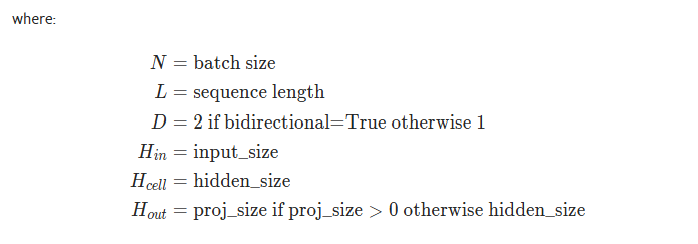 


In [74]:
# what is the total number of computations done by the network-
# A)
# embd_size=m
# hiden_state=k
# lenght of input and out sequence T
# lenght of vocab V (same for both source and target)



# B)
# total number of parameters in the network


In [97]:
# Hyperparameters
eng_vocab_size = len(eng_word2int)
hin_vocab_size = len(hin_word2int)
embed_size = 256
hidden_size = 512
num_layers = 1

# Initialize the models
encoder_lstm = Encoder(eng_vocab_size, embed_size, hidden_size, num_layers).to(device)
decoder_lstm = Decoder(hin_vocab_size, embed_size, hidden_size, num_layers).to(device)

In [83]:
# import torchinfo
from torchinfo import summary
print("Encoder summary")
summary(encoder) # do a test pass through of an example input size

Encoder summary


Layer (type:depth-idx)                   Param #
Encoder                                  --
├─Embedding: 1-1                         1,042,944
├─LSTM: 1-2                              3,153,920
Total params: 4,196,864
Trainable params: 4,196,864
Non-trainable params: 0

In [84]:
print("Dencoder summary")
summary(decoder) # do a test pass through of an example input size

Dencoder summary


Layer (type:depth-idx)                   Param #
Decoder                                  --
├─Embedding: 1-1                         864,512
├─LSTM: 1-2                              5,251,072
├─Linear: 1-3                            3,461,425
Total params: 9,577,009
Trainable params: 9,577,009
Non-trainable params: 0

In [104]:
def translate(encoder, decoder, sentence, eng_word2int, ita_int2word, max_length=15):
    encoder.eval()
    decoder.eval()
    with torch.inference_mode():
        # Tokenize and encode the sentence
        input_tensor = torch.tensor([eng_word2int[word] for word in tokenize(sentence)]
                                    + [eng_word2int[EOS_TOKEN]], dtype=torch.long)
#         print(f"shape of input tensor is {input_tensor.shape}")
        input_tensor = input_tensor.view(1, -1).to(DEVICE)  # batch_first=True

        # Pass the input through the encoder
        _, encoder_hidden, encoder_cell = encoder(input_tensor)
#         print(f"encoder hidden shape, cell shape {encoder_hidden.shape, encoder_cell.shape}")
        # encoder output

        # Initialize the decoder input with the SOS token
        decoder_input = torch.tensor([[eng_word2int[SOS_TOKEN]]], dtype=torch.long)  # SOS
#         print(f"decoder input first {decoder_input}")
        # Initialize the hidden state of the decoder with the encoder's hidden state
        decoder_hidden, decoder_cell = encoder_hidden, encoder_cell

        # Decoding the sentence
        decoded_words = []
        last_word = torch.tensor([[eng_word2int[SOS_TOKEN]]]).to(DEVICE)
        print(f"last word {last_word}")
        for di in range(max_length):
            logits, decoder_hidden, decoder_cell = decoder(last_word, decoder_hidden, decoder_cell)
#             print(f"logits shape is (should be equal to hidni vocab 3373ish) {logits.shape}")
            next_token = logits.argmax(dim=1) # greedy #
#             print(f"next token index is (expecting it to be scalar) {next_token}")
            last_word = torch.tensor([[next_token]]).to(DEVICE)
            if next_token.item() == hin_word2int[EOS_TOKEN]:
                break
            else:
                decoded_words.append(ita_int2word.get(next_token.item()))

        return ' '.join(decoded_words)

In [105]:
eng_example = "learn independence"
translate(encoder_lstm,decoder_lstm,eng_example, eng_word2int, hin_int2word)
# eng_word2int, eng_int2word = create_mappings(english_vocab)
# hin_word2int, hin_int2word = create_mappings(hindi_vocab)

shape of input tensor is torch.Size([3])
x shape torch.Size([1, 3])
embedded size torch.Size([1, 3, 256]) 
outsize torch.Size([1, 3, 512])
encoder hidden shape, cell shape (torch.Size([1, 1, 512]), torch.Size([1, 1, 512]))
decoder input first tensor([[1]])
last word tensor([[1]])
logits shape is (should be equal to hidni vocab 3373ish) torch.Size([1, 3377])
next token index is (expecting it to be scalar) tensor([1489])
logits shape is (should be equal to hidni vocab 3373ish) torch.Size([1, 3377])
next token index is (expecting it to be scalar) tensor([2627])
logits shape is (should be equal to hidni vocab 3373ish) torch.Size([1, 3377])
next token index is (expecting it to be scalar) tensor([932])
logits shape is (should be equal to hidni vocab 3373ish) torch.Size([1, 3377])
next token index is (expecting it to be scalar) tensor([1142])
logits shape is (should be equal to hidni vocab 3373ish) torch.Size([1, 3377])
next token index is (expecting it to be scalar) tensor([62])
logits shape

'नाऊ रोवे छींके टोरेंट अनम टोरेंट अनम अनम अनम मानवटरहित साभार मेजबान बम्लेश्वरी बेंडर अचीवमेंट'

In [101]:
# hin_int2word

{0: '<PAD>',
 1: '<SOS>',
 2: '<EOS>',
 3: '<UNK>',
 4: 'अंक',
 5: 'अंकोर',
 6: 'अंडमान',
 7: 'अंडरवुड',
 8: 'अंतडियां',
 9: 'अंतर्मुख',
 10: 'अंदरखाने',
 11: 'अंदाजी',
 12: 'अंधभक्तो',
 13: 'अंधापन',
 14: 'अंबानी',
 15: 'अंशांकन',
 16: 'अकापुल्को',
 17: 'अकोला',
 18: 'अक्रोन',
 19: 'अखुआपाड़ा',
 20: 'अगरतला',
 21: 'अगवाई',
 22: 'अगस्टाइन',
 23: 'अगस्ता',
 24: 'अग्नियां',
 25: 'अग्र',
 26: 'अग्रवाल',
 27: 'अग्रहरि',
 28: 'अचंभा',
 29: 'अचीवमेंट',
 30: 'अच्छी',
 31: 'अच्युत',
 32: 'अछनेरा',
 33: 'अजस्र',
 34: 'अजहर',
 35: 'अजित',
 36: 'अज्ञात',
 37: 'अटकता',
 38: 'अटके',
 39: 'अटलांटिक',
 40: 'अटवाल',
 41: 'अट्टरा',
 42: 'अट्टहास',
 43: 'अट्रैक्ट',
 44: 'अड़ंगा',
 45: 'अड़चने',
 46: 'अतहर',
 47: 'अतुल',
 48: 'अते',
 49: 'अत्री',
 50: 'अथक',
 51: 'अदाणी',
 52: 'अद्र्घ',
 53: 'अद्वैत',
 54: 'अद्वैतवाद',
 55: 'अधिकरन',
 56: 'अधिकरियों',
 57: 'अधिकारियां',
 58: 'अधिवक्तागण',
 59: 'अधिवास',
 60: 'अधीक',
 61: 'अनगढ़',
 62: 'अनम',
 63: 'अनशिदा',
 64: 'अनहोनी',
 65: 'अनाधिकारिक',
 66: 'अनावश्यक

In [79]:
import torch.optim as optim
import torch.nn as nn
import random
DEVICE=device

# Loss Function (exclude padding)
loss_fn = nn.CrossEntropyLoss(ignore_index=eng_word2int[PAD_TOKEN])

# Optimizers
encoder_optimizer = optim.AdamW(encoder.parameters())
decoder_optimizer = optim.AdamW(decoder.parameters())

# Number of epochs
num_epochs = 10

# Training Loop
encoder.train()
decoder.train()

for epoch in range(num_epochs):
    for i, (input_tensor, target_tensor) in enumerate(translation_dataloader):
        input_tensor, target_tensor = input_tensor.to(DEVICE), target_tensor.to(DEVICE)

        # Zero gradients of both optimizers
        encoder_optimizer.zero_grad()
        decoder_optimizer.zero_grad()

        target_length = target_tensor.size(1)

        # Encoder
        _, encoder_hidden, encoder_cell = encoder(input_tensor)

        # Decoder
        decoder_input = torch.full((batch_size, 1), eng_word2int[SOS_TOKEN], dtype=torch.long).to(DEVICE)
        # tensor.size(1) --> no of column
        decoder_hidden = encoder_hidden
        decoder_cell = encoder_cell

        # Randomly select a word index from the target sequence
        random_word_index = random.randint(0, target_length - 1) ## why this is being done? okay.

        loss = 0

        for di in range(target_length):
            logits, decoder_hidden, decoder_cell  = decoder(decoder_input, decoder_hidden, decoder_cell)
            #if di == random_word_index:
            #    loss = loss_fn(logits, target_tensor[:, di])
            #    break  # Only compute loss for the randomly selected word
            loss += loss_fn(logits, target_tensor[:,di])
            decoder_input = target_tensor[:, di].reshape(batch_size, 1)  # Teacher forcing


        # Backpropagation
        loss.backward()

        encoder_optimizer.step()
        decoder_optimizer.step()

        if i % 100 == 0:  # Print loss every 10 batches
            print(f'Epoch {epoch}, Batch {i}, Loss: {loss.item() / target_length:.4f}')

Epoch 0, Batch 0, Loss: 8.1529
Epoch 1, Batch 0, Loss: 4.0655
Epoch 2, Batch 0, Loss: 4.0559
Epoch 3, Batch 0, Loss: 4.0297
Epoch 4, Batch 0, Loss: 4.0109
Epoch 5, Batch 0, Loss: 3.9487
Epoch 6, Batch 0, Loss: 3.8222
Epoch 7, Batch 0, Loss: 3.5956
Epoch 8, Batch 0, Loss: 3.4109
Epoch 9, Batch 0, Loss: 3.0385


In [80]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import torch.nn.functional as F

# class Encoder(nn.Module):
#     def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
#         super().__init__()
#         self.hidden_size = hidden_size
#         self.embedding = nn.Embedding(vocab_size, embed_size)
#         self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers,
#                             batch_first=True, bidirectional=True)

#     def forward(self, x):
#         embedded = self.embedding(x)
#         outputs, (hidden, cell) = self.lstm(embedded)

#         # concatenate hidden states of the bi-directional RNN layer
#         hidden = torch.cat((hidden[0,:,:], hidden[1,:,:]), dim=1).unsqueeze(0)
#         cell = torch.cat((cell[0,:,:], cell[1,:,:]), dim=1).unsqueeze(0)

#         return outputs, hidden, cell

# class Decoder(nn.Module):
#     def __init__(self, vocab_size, embed_size, hidden_size, num_layers=1):
#         super().__init__()
#         self.hidden_size = hidden_size
#         self.embedding = nn.Embedding(vocab_size, embed_size)
#         self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=num_layers, batch_first=True)
#         self.fc = nn.Linear(hidden_size, vocab_size)

#     def forward(self, x, hidden, cell):
#         out = self.embedding(x)
#         out, (hidden, cell) = self.lstm(out, (hidden, cell))
#         out = self.fc(out).reshape(out.size(0), -1)
#         return out, hidden, cell

In [81]:
# # Hyperparameters
# eng_vocab_size = len(eng_word2int)
# ita_vocab_size = len(hin_word2int)
# embed_size = 256
# hidden_size = 512
# num_layers = 1

# # Initialize the models
# encoder = Encoder(eng_vocab_size, embed_size, hidden_size, num_layers).to(DEVICE)
# decoder = Decoder(hin_vocab_size, embed_size, hidden_size*2, num_layers).to(DEVICE)

In [ ]:
############ RNN based encode decoder ###########

In [ ]:
############ GRU based encoder decoder

In [121]:


class encoder_GRU(nn.Module):
    def __init__(self, vocab_size, hidden_size,embd_dim,num_layer=1):
        super(encoder_GRU, self).__init__()
#         self.hidden_size=hidden_size
        self.embd=nn.Embedding(vocab_size,embd_dim)
        self.gru = nn.GRU(embd_dim, hidden_size)
#         self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x=self.embd(x) # batch_size, embd_size
        out, hidden = self.gru(x)
        print(f"hidden state shape of gru is {hidden.shape}")
        print(f"output of gru is {out.shape}")
#         out = self.fc(out[-1])
        return out,hidden


# Define the GRU-based model
class decoder_GRU(nn.Module):
    def __init__(self, vocab_size, hidden_size, embd_dim, num_layer=1):
        super(decoder_GRU, self).__init__()
        self.embd=nn.Embedding(vocab_size,embd_dim)
        self.gru = nn.GRU(embd_dim, , num_layers=num_layers,
                            batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, hidden):
        x=self.embd(x)
        out, hidden = self.gru(x,hidden)
        print(f"hidden state shape of gru is {hidden.shape}")
        print(f"output of gru is {out.shape}")
        out = self.fc(out).reshape(out.size(0), -1)#??
        return out

SyntaxError: invalid syntax (1080490500.py, line 23)

In [114]:

embed_size = 256
hidden_size = 512
num_layers = 1
# Initialize the models
encoder_gru_test = encoder_GRU(eng_vocab_size, embed_size, hidden_size, num_layers).to(device)
decoder_gru_test = decoder_GRU(hin_vocab_size, embed_size, hidden_size, num_layers).to(device)

In [122]:
def translate_gru(encoder, decoder, sentence, eng_word2int, ita_int2word, max_length=15):
    encoder.eval()
    decoder.eval()
    with torch.inference_mode():
        # Tokenize and encode the sentence
        input_tensor = torch.tensor([eng_word2int[word] for word in tokenize(sentence)]
                                    + [eng_word2int[EOS_TOKEN]], dtype=torch.long)
        print(f"shape of input tensor is {input_tensor.shape}")
        input_tensor = input_tensor.view(1, -1).to(DEVICE)  # batch_first=True

        # Pass the input through the encoder
        _, encoder_hidden = encoder(input_tensor)
        print(f"encoder hidden shape {encoder_hidden.shape}")
        # encoder output

        # Initialize the decoder input with the SOS token
        decoder_input = torch.tensor([[eng_word2int[SOS_TOKEN]]], dtype=torch.long)  # SOS
        print(f"decoder input first {decoder_input}")
        # Initialize the hidden state of the decoder with the encoder's hidden state
        decoder_hidden = encoder_hidden

        # Decoding the sentence
        decoded_words = []
        last_word = torch.tensor([[eng_word2int[SOS_TOKEN]]]).to(DEVICE)
        print(f"last word {last_word}")
        for di in range(max_length):
            logits, decoder_hidden = decoder(last_word, decoder_hidden)
            print(f"logits shape is (should be equal to hidni vocab 3373ish) {logits.shape}")
            next_token = logits.argmax(dim=1) # greedy #
            print(f"next token index is (expecting it to be scalar) {next_token}")
            last_word = torch.tensor([[next_token]]).to(DEVICE)
            if next_token.item() == hin_word2int[EOS_TOKEN]:
                break
            else:
                decoded_words.append(ita_int2word.get(next_token.item()))

        return ' '.join(decoded_words)

In [123]:
eng_example = "learn independence"
translate_gru(encoder_gru_test,decoder_gru_test,eng_example, eng_word2int, hin_int2word)
# eng_word2int, eng_int2word = create_mappings(english_vocab)
# hin_word2int, hin_int2word = create_mappings(hindi_vocab)

shape of input tensor is torch.Size([3])
hidden state shape of gru is torch.Size([1, 3, 256])
output of gru is torch.Size([1, 3, 256])
encoder hidden shape torch.Size([1, 3, 256])
decoder input first tensor([[1]])
last word tensor([[1]])


RuntimeError: Expected hidden size (1, 1, 256), got [1, 3, 256]

In [124]:


class encoder_RNN(nn.Module):
    def __init__(self, vocab_size, hidden_size, output_size,embd_dim):
        super(encoder_RNN, self).__init__()
#         self.hidden_size=hidden_size
        self.embd=nn.Embedding(vocab_size,embd_dim)
        self.rnn = nn.RNN(embd_dim, hidden_size)
#         self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x=self.embd(x) # batch_size, embd_size
        out, hidden = self.rnn(x)
        print(f"hidden state shape of rnn is {hidden.shape}")
        print(f"output of rnn is {out.shape}")
#         out = self.fc(out[-1])
        return out,hidden


# Define the RNN-based model
class decoder_RNN(nn.Module):
    def __init__(self, vocab_size, hidden_size, output_size,embd_dim):
        super(decoder_RNN, self).__init__()
        self.embd=nn.Embedding(vocab_size,embd_dim)
        self.rnn = nn.RNN(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x,hidden):
        x=self.embd(x)
        out, hidden = self.rnn(x,hidden)
        print(f"hidden state shape of RNN is {hidden.shape}")
        print(f"output of RNN is {out.shape}")
        out = self.fc(out).reshape(out.size(0), -1)
        return out

In [125]:
embed_size = 256
hidden_size = 512
num_layers = 1
# Initialize the models
encoder_rnn_test = encoder_RNN(eng_vocab_size, embed_size, hidden_size, num_layers).to(device)
decoder_rnn_test = decoder_RNN(hin_vocab_size, embed_size, hidden_size, num_layers).to(device)

In [126]:
def translate_rnn(encoder, decoder, sentence, eng_word2int, ita_int2word, max_length=15):
    encoder.eval()
    decoder.eval()
    with torch.inference_mode():
        # Tokenize and encode the sentence
        input_tensor = torch.tensor([eng_word2int[word] for word in tokenize(sentence)]
                                    + [eng_word2int[EOS_TOKEN]], dtype=torch.long)
        print(f"shape of input tensor is {input_tensor.shape}")
        input_tensor = input_tensor.view(1, -1).to(DEVICE)  # batch_first=True

        # Pass the input through the encoder
        _, encoder_hidden = encoder(input_tensor)
        print(f"encoder hidden shape {encoder_hidden.shape}")
        # encoder output

        # Initialize the decoder input with the SOS token
        decoder_input = torch.tensor([[eng_word2int[SOS_TOKEN]]], dtype=torch.long)  # SOS
        print(f"decoder input first {decoder_input}")
        # Initialize the hidden state of the decoder with the encoder's hidden state
        decoder_hidden = encoder_hidden

        # Decoding the sentence
        decoded_words = []
        last_word = torch.tensor([[eng_word2int[SOS_TOKEN]]]).to(DEVICE)
        print(f"last word {last_word}")
        for di in range(max_length):
            logits, decoder_hidden = decoder(last_word, decoder_hidden)
            print(f"logits shape is (should be equal to hidni vocab 3373ish) {logits.shape}")
            next_token = logits.argmax(dim=1) # greedy #
            print(f"next token index is (expecting it to be scalar) {next_token}")
            last_word = torch.tensor([[next_token]]).to(DEVICE)
            if next_token.item() == hin_word2int[EOS_TOKEN]:
                break
            else:
                decoded_words.append(ita_int2word.get(next_token.item()))

        return ' '.join(decoded_words)

In [127]:
eng_example = "learn independence"
translate_rnn(encoder_rnn_test,decoder_rnn_test,eng_example, eng_word2int, hin_int2word)
# eng_word2int, eng_int2word = create_mappings(english_vocab)
# hin_word2int, hin_int2word = create_mappings(hindi_vocab)

shape of input tensor is torch.Size([3])
hidden state shape of rnn is torch.Size([1, 3, 256])
output of rnn is torch.Size([1, 3, 256])
encoder hidden shape torch.Size([1, 3, 256])
decoder input first tensor([[1]])
last word tensor([[1]])


RuntimeError: Expected hidden size (1, 1, 256), got [1, 3, 256]